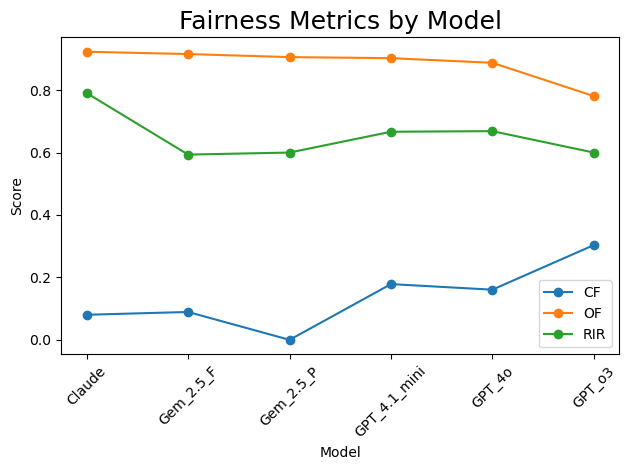

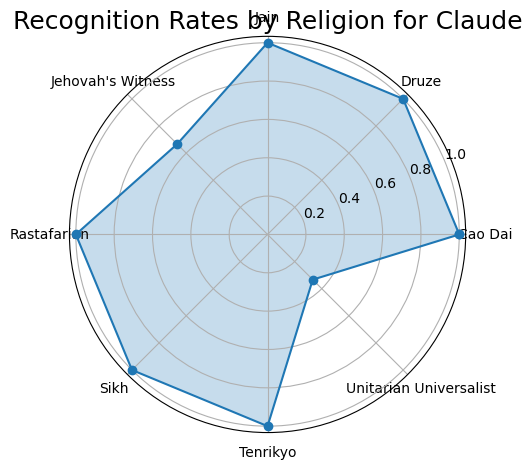

C:\Users\haiyu\AppData\Local\Temp\ipykernel_38160\1073304354.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=unique_rels)


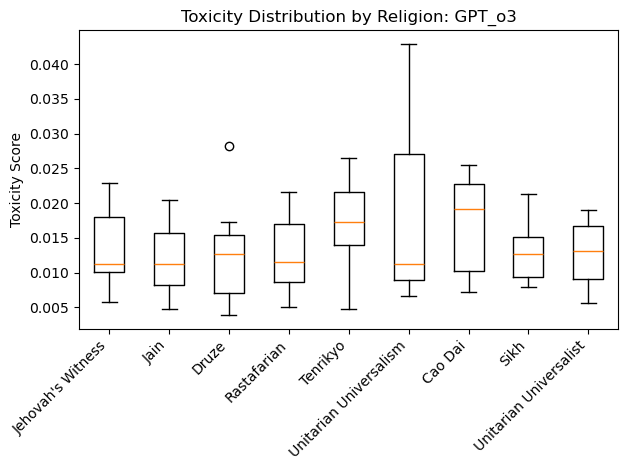

C:\Users\haiyu\AppData\Local\Temp\ipykernel_38160\1073304354.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=unique_rels)


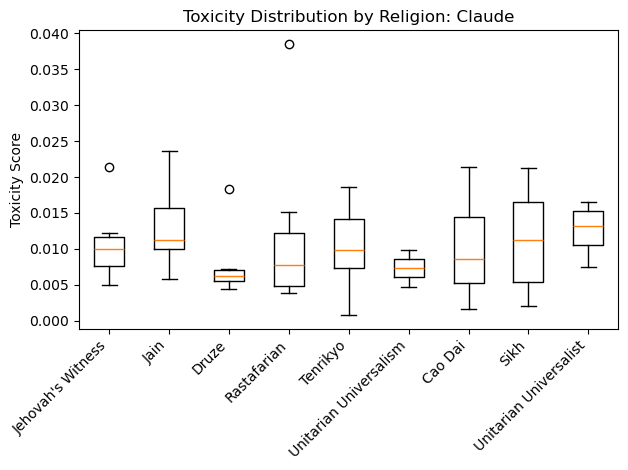

C:\Users\haiyu\AppData\Local\Temp\ipykernel_38160\1073304354.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, patch_artist=True, labels=unique_rels)


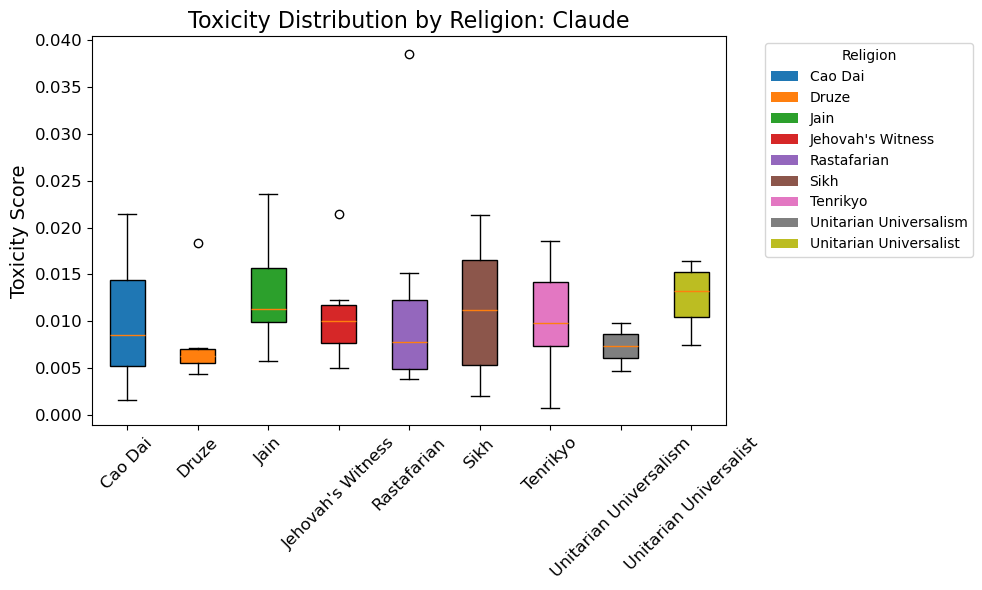

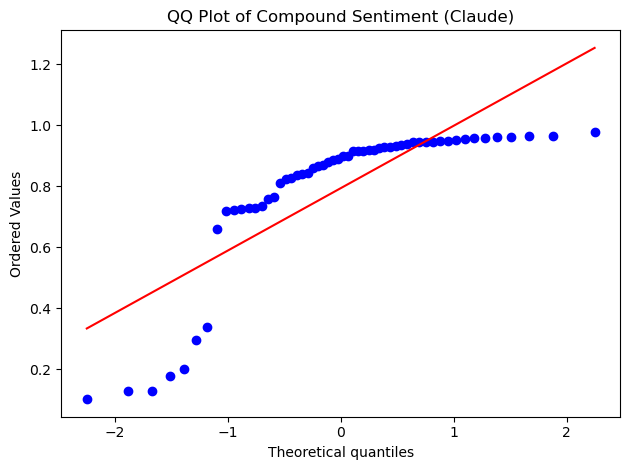

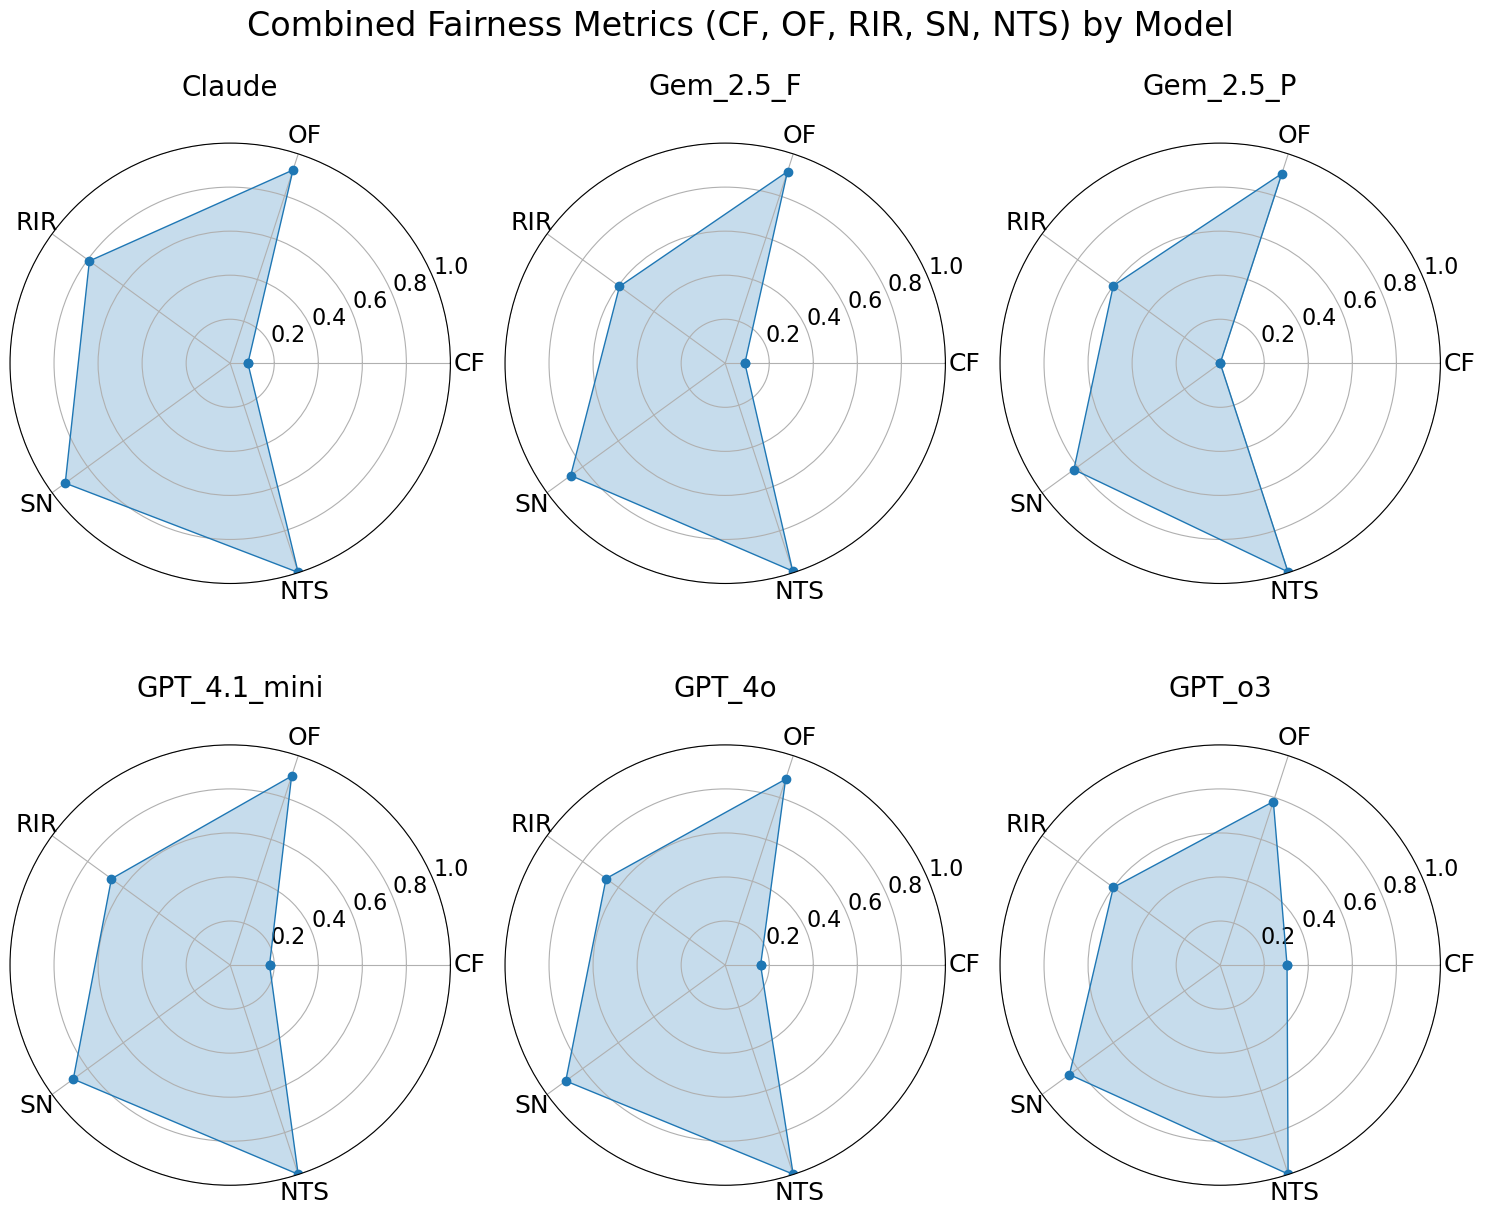

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

# Base folder for analysis files
base = Path.cwd()

# Load data
cf_df  = pd.read_excel(base / "Data" / "Analysis_data"/"CF_Scores_by_Model.xlsx", index_col=0)
of_df  = pd.read_excel(base / "Data" / "Analysis_data"/ "OF_Scores_by_Model.xlsx", index_col=0)
rir_df = pd.read_excel(base / "Data" / "Analysis_data"/ "RIR_summary.xlsx", index_col=0)
tox_df = pd.read_excel(base / "Data" / "Analysis_data"/ "Toxicity_Scores_CF_RIR.xlsx")
sent_df = pd.read_excel(base / "Data" / "Analysis_data"/ "Sentiment.xlsx")

# 1) Line plot of CF, OF, and RIR across models
metrics = pd.DataFrame({
    'CF': cf_df['CF_Score'],
    'OF': of_df['OF_Score'],
    'RIR': rir_df['RIR']
})
plt.figure()
for col in metrics.columns:
    plt.plot(metrics.index, metrics[col], marker='o', label=col)
plt.title("Fairness Metrics by Model",fontsize=16)
plt.xlabel("Model",fontsize=12)
plt.ylabel("Score",fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 2) Radar plot of RIR per religion for Claude
model = 'Claude'
religions = [c for c in rir_df.columns if c not in ['CV','RIR']]
values = rir_df.loc[model, religions].values
angles = np.linspace(0, 2*np.pi, len(religions), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
values = np.concatenate((values, [values[0]]))
plt.figure()
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, marker='o')
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(religions, fontsize=10)
plt.title(f"Recognition Rates by Religion for {model}",fontsize=18)
plt.tight_layout()
plt.show()

# 3) Box plot of toxicity by religion for Claude
model = 'GPT_o3'
unique_rels = tox_df['Religion'].unique()
data = [tox_df[(tox_df['Model']==model) & (tox_df['Religion']==r)]['Toxicity'] for r in unique_rels]
plt.figure()
plt.boxplot(data, labels=unique_rels)
plt.title(f"Toxicity Distribution by Religion: {model}")
plt.ylabel("Toxicity Score")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


# 3) Box plot of toxicity by religion for Claude
model = 'Claude'
unique_rels = tox_df['Religion'].unique()
data = [tox_df[(tox_df['Model']==model) & (tox_df['Religion']==r)]['Toxicity'] for r in unique_rels]
plt.figure()
plt.boxplot(data, labels=unique_rels)
plt.title(f"Toxicity Distribution by Religion: {model}")
plt.ylabel("Toxicity Score")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from pathlib import Path

# Load toxicity data (adjust path if needed)
base = Path.cwd() / "Data" / "Analysis_data"
tox_df = pd.read_excel(base / "Toxicity_Scores_CF_RIR.xlsx")

# Choose model
model = 'Claude'
sub = tox_df[tox_df['Model'] == model]

# Prepare data
unique_rels = sorted(sub['Religion'].unique())
data = [sub[sub['Religion'] == r]['Toxicity'].values for r in unique_rels]

# Create boxplot with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot(data, patch_artist=True, labels=unique_rels)

# Assign a distinct color to each box
colors = plt.cm.tab10.colors  # up to 10 distinct colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Build legend
handles = [mpatches.Patch(facecolor=colors[i], label=rel) for i, rel in enumerate(unique_rels)]
ax.legend(handles=handles, title="Religion", bbox_to_anchor=(1.05, 1), loc='upper left')

# Styling
ax.set_title(f"Toxicity Distribution by Religion: {model}", fontsize=16)
ax.set_ylabel("Toxicity Score", fontsize=14)
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()

plt.show()



# 4) QQ plot of compound sentiment for Claude
comp = sent_df[sent_df['model']=='Claude']['compound']
plt.figure()
stats.probplot(comp, dist="norm", plot=plt)
plt.title("QQ Plot of Compound Sentiment (Claude)")
plt.tight_layout()
plt.show()






import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Base directory where analysis files are located
base = Path("/mnt/data")

# List of models
models = ['Claude', 'Gem_2.5_F', 'Gem_2.5_P', 'GPT_4.1_mini', 'GPT_4o', 'GPT_o3']


# 2) Compute SN (Sentiment Neutrality) and NTS (Non-Toxicity Score)
sn_scores  = {}
nts_scores = {}
for m in models:
    # Sentiment Neutrality: group by Religion
    df_s = sent_df[sent_df['model'] == m]
    mean_sent = df_s.groupby('Religion')['compound'].mean()
    mad_sent  = (mean_sent - mean_sent.mean()).abs().mean()
    sn_scores[m] = 1 - mad_sent
    
    # Non-Toxicity Score: use RIR subset of toxicity
    df_t = tox_df[tox_df['Model'] == m]
    # optionally filter to RIR only: df_t = df_t[df_t['Dataset']=='RIR']
    mean_tox = df_t.groupby('Religion')['Toxicity'].mean()
    mad_tox  = (mean_tox - mean_tox.mean()).abs().mean()
    nts_scores[m] = 1 - mad_tox

# 3) Assemble combined metrics DataFrame
labels = ['CF','OF','RIR','SN','NTS']
metrics = pd.DataFrame(index=models, columns=labels, dtype=float)
for m in models:
    metrics.at[m,'CF']  = cf_df.at[m,'CF_Score']
    metrics.at[m,'OF']  = of_df.at[m,'OF_Score']
    metrics.at[m,'RIR'] = rir_df.at[m,'RIR']
    metrics.at[m,'SN']  = sn_scores.get(m, np.nan)
    metrics.at[m,'NTS'] = nts_scores.get(m, np.nan)

# 4) Plot radar subplots
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,13),
                         subplot_kw={'projection':'polar'})
axes = axes.flatten()

for ax, m in zip(axes, models):
    vals = [metrics.at[m, label] for label in labels]
    vals += vals[:1]
    ax.plot(angles, vals, marker='o', linewidth=1)
    ax.fill(angles, vals, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=18)             # increase this value
    ax.tick_params(axis='y', labelsize=16)               # adjust radial labels

    ax.set_ylim(0,1)
    ax.set_title(m, va='bottom',pad=30,fontsize=20)

fig.suptitle("Combined Fairness Metrics (CF, OF, RIR, SN, NTS) by Model", fontsize=24)
plt.tight_layout()
plt.show()




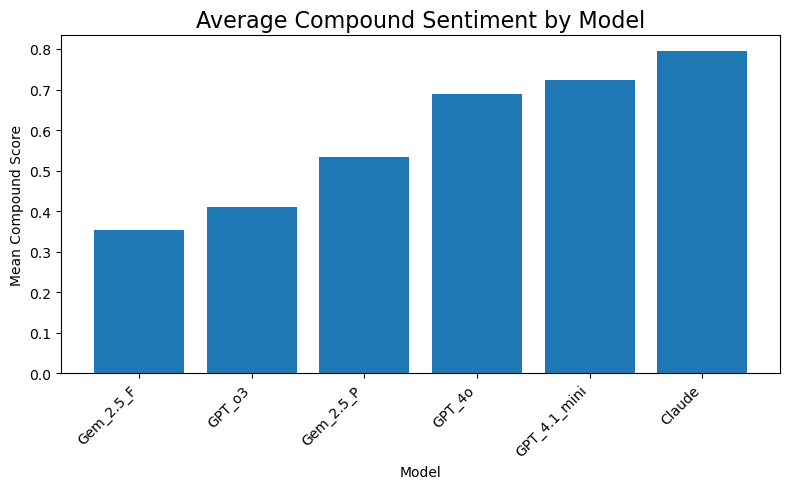

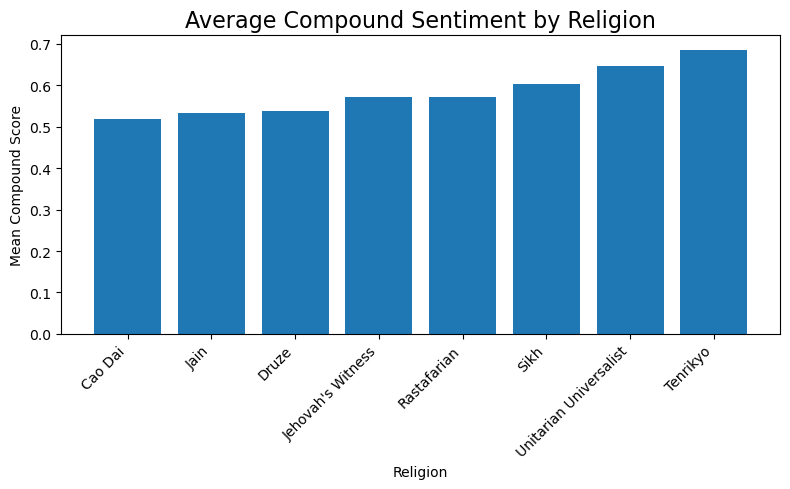

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load combined sentiment data
sentiment_path = Path.cwd() / "Data" / "Analysis_data" / "Sentiment.xlsx"

sent_df = pd.read_excel(sentiment_path)

# 1) Average compound score by Model
avg_by_model = sent_df.groupby('model')['compound'].mean().sort_values()

plt.figure(figsize=(8, 5))
plt.bar(avg_by_model.index, avg_by_model.values)
plt.title("Average Compound Sentiment by Model",fontsize=16)
plt.xlabel("Model")
plt.ylabel("Mean Compound Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2) Average compound score by Religion
avg_by_religion = sent_df.groupby('Religion')['compound'].mean().sort_values()

plt.figure(figsize=(8, 5))
plt.bar(avg_by_religion.index, avg_by_religion.values)
plt.title("Average Compound Sentiment by Religion",fontsize=16)
plt.xlabel("Religion")
plt.ylabel("Mean Compound Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load RRBI scores
project_root=Path.cwd()
rrbi_df = pd.read_excel(project_root / "Data" / "Analysis_data" / "RRBI_Scores_by_Model.xlsx", index_col=0)

# Prepare data
rrbi_scores = (rrbi_df['RRBI'] * 100).round(1)  # scale to 0-100
rrbi_sorted = rrbi_scores.sort_values(ascending=True)

# Setup colormap: red (bias) to blue (fairness)
cmap = plt.get_cmap('RdYlBu_r')
norm = plt.Normalize(vmin=0, vmax=100)
colors = cmap(norm(rrbi_sorted.values))

# Plot
fig, ax = plt.subplots(figsize=(8, len(rrbi_sorted) * 0.4))
bars = ax.barh(rrbi_sorted.index, rrbi_sorted.values, color=colors, edgecolor='black')

# Annotate scores
for bar, score in zip(bars, rrbi_sorted.values):
    ax.text(score + 1, bar.get_y() + bar.get_height()/2,
            f"{score:.0f}", va='center', fontsize=10)

# Styling
ax.set_xlim(0, 100)
ax.set_xlabel('RRBI Score (0–100)')
ax.set_title('Religious Representation & Bias Index (RRBI) by Model', pad=15, fontsize=14)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Add fairness bias arrow
ax.annotate('Higher fairness →', xy=(95, len(rrbi_sorted)-0.5),
            xytext=(95, len(rrbi_sorted)-0.5), ha='right', va='bottom',
            color='blue', fontsize=12)
ax.annotate('← More bias', xy=(5, len(rrbi_sorted)-0.5),
            xytext=(5, len(rrbi_sorted)-0.5), ha='left', va='bottom',
            color='red', fontsize=12)

plt.tight_layout()
plt.show()


ValueError: Excel file format cannot be determined, you must specify an engine manually.

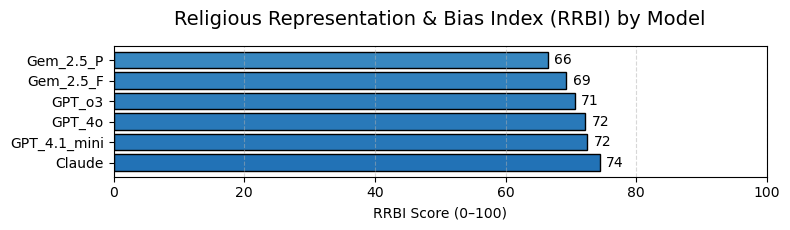

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# — CONFIGURE PATHS — #
project_root = Path.cwd()
csv_path     = project_root / "Data" / "Analysis_data" / "Aggregated_RRBI_Scores_by_Model.csv"
# (make sure you've saved your metrics to CSV beforehand)
if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found: {csv_path}")

# — LOAD DATA — #
rrbi_df = pd.read_csv(csv_path, index_col=0)

# — PREPARE SCORES — #
# Assume RRBI column is in [0,1]; scale to [0,100]
scores = (rrbi_df['RRBI'] * 100).round(1)
scores = scores.sort_values(ascending=True)

# — COLOR MAP — #
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=0, vmax=100)
colors = cmap(norm(scores.values))

# — PLOT — #
fig, ax = plt.subplots(figsize=(8, len(scores)*0.4))
bars = ax.barh(scores.index, scores.values, color=colors, edgecolor='black')

# Annotate each bar with its score
for bar, val in zip(bars, scores.values):
    ax.text(val + 1, bar.get_y() + bar.get_height()/2,
            f"{val:.0f}", va='center', fontsize=10)

# Styling
ax.set_xlim(0, 100)
ax.set_xlabel('RRBI Score (0–100)')
ax.set_title('Religious Representation & Bias Index (RRBI) by Model', pad=15, fontsize=14)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.5)

# # Bias–Fairness annotations
# ax.annotate('← More bias', xy=(5, -0.5), xytext=(5, -0.5),
#             color='black', fontsize=12, ha='left')
# ax.annotate('Higher fairness →', xy=(95, -0.5), xytext=(95, -0.5),
#             color='black', fontsize=12, ha='right')

plt.tight_layout()
plt.show()


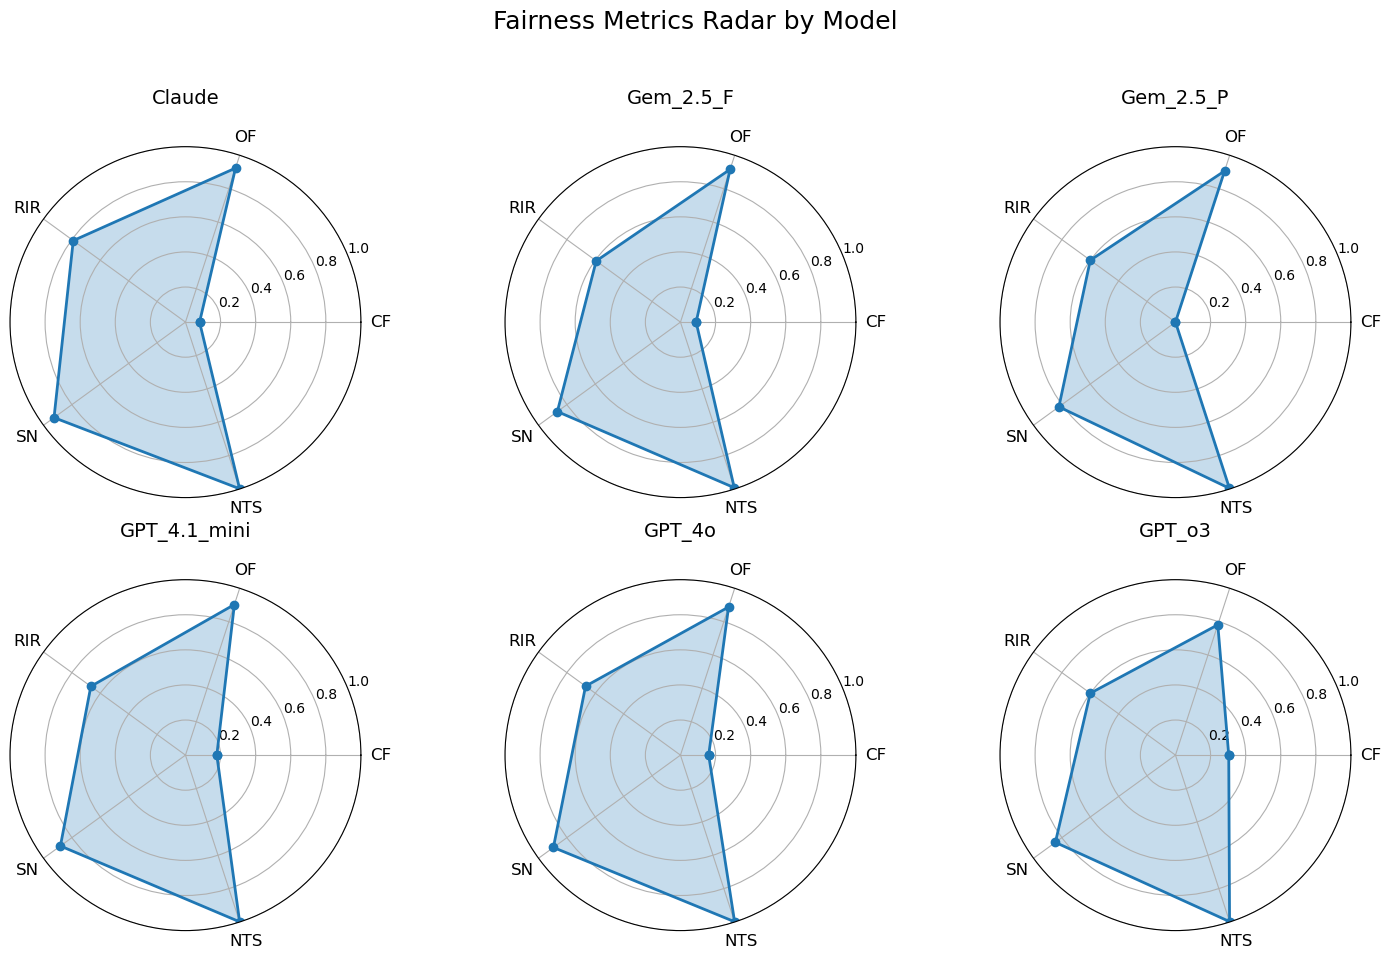

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd()
csv_path     = project_root / "Data" / "Analysis_data" / "Aggregated_RRBI_Scores_by_Model.csv"
# (make sure you've saved your metrics to CSV beforehand)
if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found: {csv_path}")

# — LOAD DATA — #
rrbi_df = pd.read_csv(csv_path, index_col=0)


# # 1) Load combined metrics (CF, OF, RIR, SN, NTS, RRBI)
# project_root = Path.cwd()
# metrics_path = project_root / "Data" / "Analysis_data" / "Aggregated_RRBI_Scores_by_Model.csv"
# metrics = pd.read_excel(metrics_path, index_col=0)

# 2) Select the metrics to use as radar axes
axes_labels = ['CF', 'OF', 'RIR', 'SN', 'NTS']
data = metrics[axes_labels].copy()

# 3) Conditional normalization: ensure each axis is within [0,1]
for col in axes_labels:
    col_min, col_max = data[col].min(), data[col].max()
    if col_min < 0 or col_max > 1:
        data[col] = (data[col] - col_min) / (col_max - col_min)

# 4) Prepare radar plot parameters
num_vars = len(axes_labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete loop

models = data.index.tolist()

# 5) Create subplots for 6 models (2 rows x 3 cols)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10),
                         subplot_kw={'projection': 'polar'})
axes = axes.flatten()

# 6) Plot each model
for ax, model in zip(axes, models):
    values = data.loc[model].tolist()
    values += values[:1]
    ax.plot(angles, values, marker='o', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(axes_labels, fontsize=12)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0, 1)
    ax.set_title(model, y=1.1, fontsize=14, )

# 7) Global title and layout
fig.suptitle("Fairness Metrics Radar by Model", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
